# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combined_data = pd.merge(study_results,mouse_metadata)
# Display the data table for preview
mouse_combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Checking the number of mice.
No_Of_Mice = mouse_metadata["Mouse ID"].nunique()
No_Of_Mice

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_Id = mouse_combined_data.loc[mouse_combined_data.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_Id

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_Id_Df = mouse_combined_data.loc[mouse_combined_data["Mouse ID"]=="g989", :]
duplicate_Id_Df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse_clean_DF = mouse_combined_data[mouse_combined_data["Mouse ID"].isin(duplicate_Id)==False]
Mouse_clean_DF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_No_Mice= Mouse_clean_DF["Mouse ID"].nunique()
clean_No_Mice

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stat_mean= Mouse_clean_DF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
summary_stat_median = Mouse_clean_DF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
summary_stat_variance = Mouse_clean_DF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
summary_stat_Sdev = Mouse_clean_DF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
summary_stat_SEM = Mouse_clean_DF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_DF = pd.DataFrame({"Mean Tumor Volume":summary_stat_mean,"Median Tumor Volume":summary_stat_median,
                           "Tumor Volume VariancE":summary_stat_variance,"Tumor Volume Std. Dev.":summary_stat_Sdev,
                           "Tumor Volume Std. Err.":summary_stat_SEM})
summary_DF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume VariancE,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = Mouse_clean_DF.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean,np.median,np.var,np.std,st.sem])
summary_agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

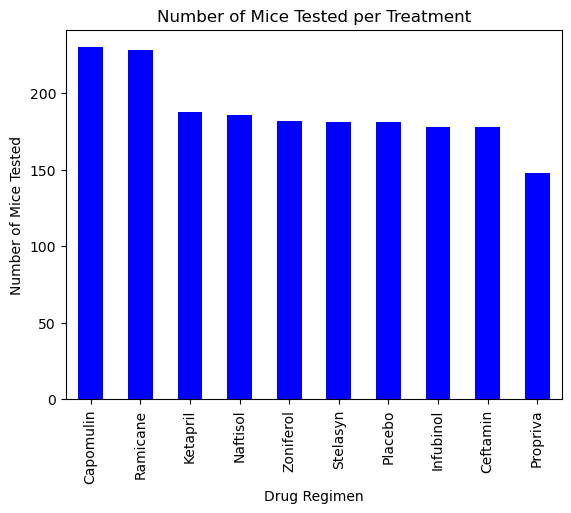

In [14]:
# Generate a bar plot showing the total number of timepoints for each drug regimen using Pandas.
No_mice_tested = Mouse_clean_DF["Drug Regimen"].value_counts()
No_mice_tested.plot.bar(color='b')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

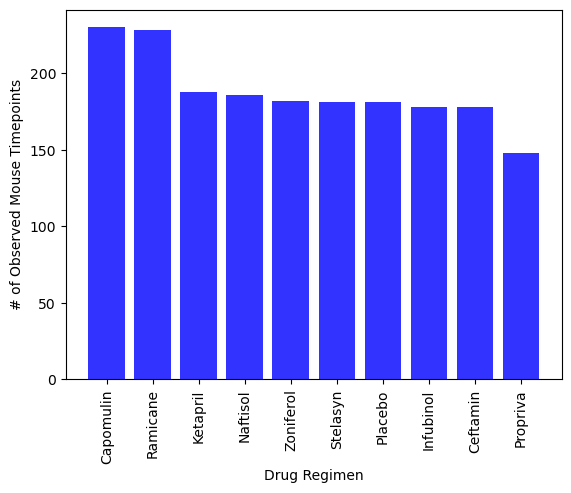

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_regimen= No_mice_tested.index.values
x_axis = np.arange(len(Drug_regimen))
x_axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Drug_regimen)
plt.bar(x_axis, No_mice_tested.values, color="b", alpha=0.8,align="center")
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()

Text(0.5, 1.0, 'Female vs Male')

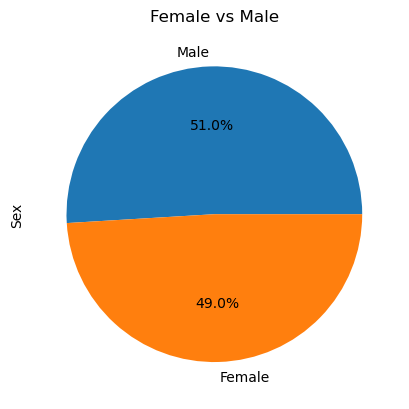

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender_DF= Mouse_clean_DF["Sex"].value_counts()
Gender_DF.plot(kind="pie",ylabel="Sex",autopct= "%1.1f%%")
plt.title("Female vs Male")

Text(0, 0.5, 'Sex')

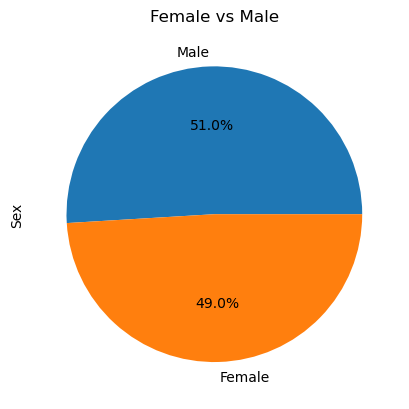

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
y= Mouse_clean_DF["Sex"].value_counts()
plt.pie(y,labels=labels,autopct = "%1.1f%%")
plt.title("Female vs Male")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
great_timepoint = Mouse_clean_DF.groupby("Mouse ID")["Timepoint"].max()
great_timepoint_df=pd.DataFrame(great_timepoint)
great_timepoint_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Tumor_vol_df=pd.merge(Mouse_clean_DF,great_timepoint_df,on=["Mouse ID" ,"Timepoint"])
Tumor_vol_df.head(35)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
5,h246,45,74.104086,2,Ketapril,Male,13,30
6,p189,45,75.294936,4,Ketapril,Male,8,28
7,n923,40,66.229606,3,Ketapril,Male,19,30
8,q119,10,51.236606,0,Ketapril,Male,17,30
9,f993,20,52.079510,1,Naftisol,Male,21,28


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment_regimen=["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in Treatment_regimen:
    volume_val=  Tumor_vol_df.loc[Tumor_vol_df["Drug Regimen"]==regimen, "Tumor Volume (mm3)"]
    Tumor_vol_data.append(volume_val)
    
    # add subset 
    quartiles = volume_val.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = (volume_val.loc[(Tumor_vol_df["Tumor Volume (mm3)"]>=upper_bound)|
                                        (Tumor_vol_df["Tumor Volume (mm3)"]<=lower_bound)])
    
    outlier_count=outlier.count()
    print(f"{regimen}'s \n   InterQuartile Range (IQR): {iqr}")
    #print(f"{regimen}'s Lower bound:{lower_bound}") 
    print(f"   potential outliers:{outlier_count},  {outlier}")
    
  

Capomulin's 
   InterQuartile Range (IQR): 7.781863460000004
   potential outliers:0,  Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's 
   InterQuartile Range (IQR): 9.098536719999998
   potential outliers:0,  Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's 
   InterQuartile Range (IQR): 11.477135160000003
   potential outliers:1,  29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's 
   InterQuartile Range (IQR): 15.577752179999997
   potential outliers:0,  Series([], Name: Tumor Volume (mm3), dtype: float64)


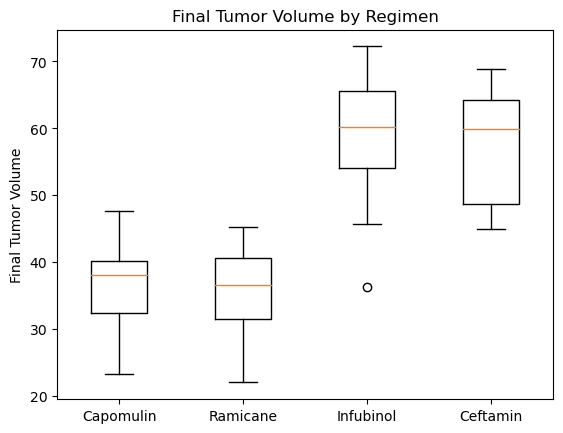

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

ax1.boxplot(Tumor_vol_data)
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_ylabel('Final Tumor Volume')

plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

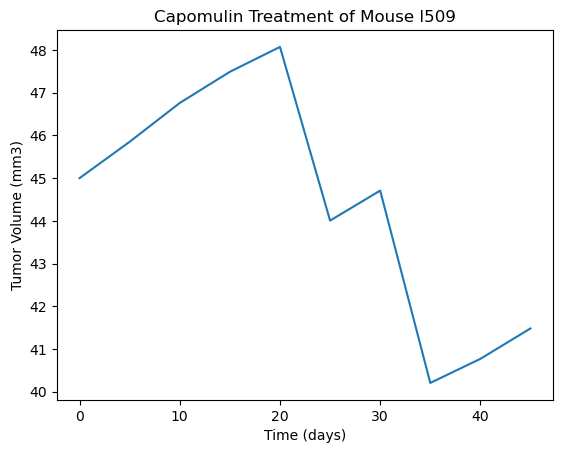

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_Mouse = Mouse_clean_DF.loc[Mouse_clean_DF['Mouse ID'] == 'l509']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(Capomulin_Mouse['Timepoint'], Capomulin_Mouse['Tumor Volume (mm3)'])

# display labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

# Display plot
plt.show()


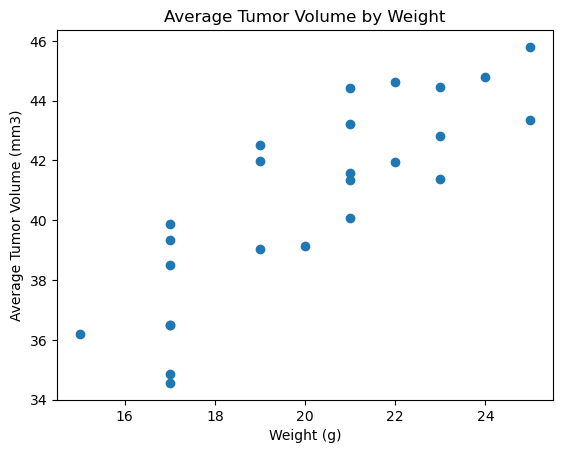

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_DF= Mouse_clean_DF.loc[Mouse_clean_DF["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
Capomulin_DF.head()
avg_Tumor_vol=Capomulin_DF['Tumor Volume (mm3)'].mean()
avg_mouse_Wt = Capomulin_DF["Weight (g)"].unique()
avg_mouse_Wt

plt.scatter(avg_mouse_Wt,avg_Tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between the mouse weight and the average tumor volume is 0.84.


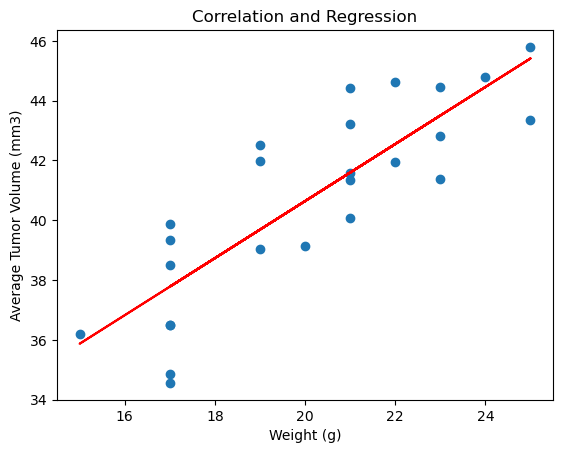

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_mouse_Wt = avg_mouse_Wt.astype(float)
correlation = st.pearsonr(avg_mouse_Wt, avg_Tumor_vol)

x=avg_mouse_Wt
y=avg_Tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(avg_mouse_Wt, avg_Tumor_vol)
plt.plot(avg_mouse_Wt, regress_values, "r-")
plt.title("Correlation and Regression")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between the mouse weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()